In [1]:
import pandas as pd
import plotly
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Reading CSV

In [3]:
listing = pd.read_csv('CSV/listings.csv')
reviews = pd.read_csv('CSV/reviews.csv')

In [4]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200121213543,2020-01-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,2020-01-22,246,26,2010-07-15,2019-12-22,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.12
1,21280,https://www.airbnb.com/rooms/21280,20200121213543,2020-01-22,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/81163/profile...,https://

# Part I: How does price changes with location ? 

- Price prepocessing

In [5]:
# Converting price column to float
listing['price'] = listing['price'].astype(str)

In [6]:
def func_remove_character(x, character):
    """ Returns string with the character removed
    
    Args:
        x (str): The string that will have the character removed
        character (str): character to be removed from x
    
    Returns:
        String with the symbol removed
    
    """
    return x.replace(character, '')

In [7]:
listing['price'] = listing.price.apply(lambda x: func_remove_character(str(x), '$'))
listing['price'] = listing.price.apply(lambda x: func_remove_character(str(x), ','))

In [8]:
listing['price'] = listing['price'].astype(float)

- Analyzing Price distribution

In [9]:
listing['price'].describe() # 75% of price values is below 600.

count    34754.000000
mean       645.688180
std       1674.245213
min          0.000000
25%        155.000000
50%        298.000000
75%        600.000000
max      41966.000000
Name: price, dtype: float64

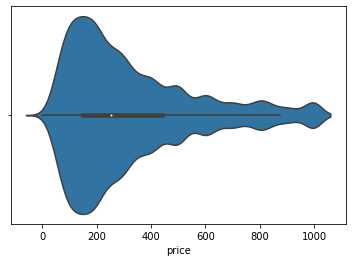

In [10]:
sns.violinplot(x=listing.loc[listing['price'] < 1000, 'price']);

Some listings contains a price with value zero, which is, clearly, a mistake. This values are dropped from the dataset since there are few of them.

In [11]:
listing.loc[listing['price'] <= 0, 'price']

19690    0.0
20191    0.0
20207    0.0
20208    0.0
20213    0.0
20214    0.0
20234    0.0
Name: price, dtype: float64

In [12]:
listing.drop(listing.loc[listing['price'] <= 0].index, axis = 0, inplace = True)

Since price is not well distributed, a binning technique will be applied in order to better analyze data. The values below were in order to keep similar distributions between classes:
- 0: [0, 100]
- 1: (100,150]
- 2: (150, 200]
- 3: (200, 250]
- 4: (250, 300]
- 5: (300, 400]
- 6: (400, 600]
- 7: (600, 1000]
- 8: (1000, 100000] # the maximum price of the dataset is 41966.0


In [13]:
bins_price = [0, 100, 150, 200, 250, 300, 400, 600, 1000, 100000] 
price_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [14]:
listing['price_bins'] = pd.cut(listing['price'], bins_price, labels = price_labels, include_lowest = True)

In [15]:
listing['price_bins'] = listing['price_bins'].astype(int)

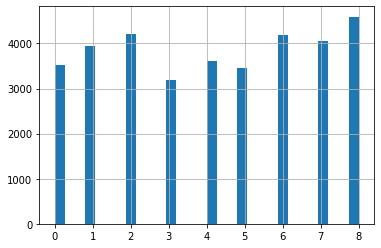

In [16]:
listing['price_bins'].hist(bins = 30);

## Price VS Location

Analyzing different values for host_neighbourhood

In [17]:
listing['host_neighbourhood'].value_counts()

Copacabana                           7050
Ipanema                              2623
Barra da Tijuca                      2567
Botafogo                             1162
Leblon                               1122
Recreio dos Bandeirantes              967
Flamengo                              796
Santa Teresa                          735
Lapa                                  559
Laranjeiras                           480
Leme                                  476
Tijuca                                460
Glória                                246
Lagoa                                 238
Catete                                225
Humaitá                               209
Centro                                208
Jardim Botânico                       189
Vila Isabel                           185
Gávea                                 185
Maracanã                              161
São Conrado                           156
Vidigal                               149
Urca                              

In order to analyze price for diffenrent neibourhoods, the column price_bins was used instead of the price column, since its well distributed between each class, therefore the mean will be less sensitive to outliers.  

In [18]:
listing.groupby('host_neighbourhood').agg({'price_bins': 'mean'}).sort_values(by = 'price_bins')

,price_bins
host_neighbourhood,
Almagro,0.000000
Vila Kosmos,0.000000
Honório Gurgel,0.000000
Vigário Geral,0.000000
Jacaré,0.000000
Jardim América,0.000000
Kilmainham,0.000000
Sion,0.000000
Oswaldo Cruz,0.000000


There are 163 different neighbourhoods, which makes the analysis difficult based on the price_bins mean for every single neighbourhood. There is also the problem that some neighbourhoods, only contains one sample, which can cause wrong intuitions about the location average price (clusterizing some locations could be one solution, but it isn't the best approache).

One way to come across this problem was to make a visual analysis.

In [56]:
# In order to use the function below, you must have a public token to use the map-ox api. Check more on: https://www.mapbox.com
px.set_mapbox_access_token('pk.eyJ1IjoiZGFuaWVsZGFjb3N0YSIsImEiOiJjazZzMGZ0c3gwYncwM2tzNW51d3B2ajUyIn0.U6j8vTW4kIJal4aBWEyDtQ')
fig = px.scatter_mapbox(listing, lat='latitude', lon='longitude', color='price_bins', size_max=20, zoom=9)
fig.show()

In [59]:
# Print Screen from image above, for visualization on GitHub:

<img src="Images/price_location.PNG" width=800>

From the image above its possible to observe that, the price tends to be higher for Airbnbs that are close to the beach. 
For those people that are more familiar with Rio de Janeiro geography: we can also observe that the price is higher, in average, for the most famous neighbourhoods: Leblon, Ipanema, Lagoa and Barra da Tijuca.

# Part II: Does the host response rate affect his review scores rate ?

- Preprocessing host_response_rate & review_scores_rating

Checking of null values.

In [20]:
listing['host_response_rate'].isnull().sum()

11907

There are 11907 null values for the column host_response_rate. There isn't a way to fill up this huge gap. Therefore, the analysis will be done with the rest of the dataset, which isn't a poor analysis, but not a perfect one either, since there are still 16434 samples. 

In [21]:
# Creating a new dataset with the non null values of host_response_rate and review_scores_rating
response_and_score = listing.loc[(~listing.host_response_rate.isna()) & (~listing.review_scores_rating.isna())]

In [22]:
func_clean_response = lambda x: int(str(x).replace('%', ''))

In [23]:
# removing character '%' from host_response_rate
response_and_score['host_response_rate'] = response_and_score.host_response_rate.apply(lambda x:  func_remove_character(str(x), '%'))
response_and_score['host_response_rate'] = response_and_score['host_response_rate'].astype(int)

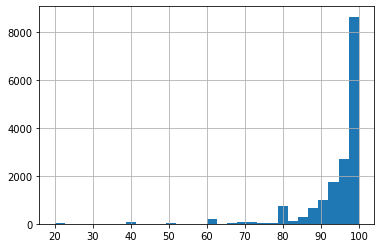

In [24]:
response_and_score.review_scores_rating.hist(bins = 30);

As observed above, the host_response_rate has very imbalanced distribuition, which can cause a misleading analysis. Just like it was done for the column price, a binning thecnique will also be applied to this column.

- 0 : [0, 0.96]
- 1: (0.96, 100]

In [25]:
score_bins = [0, 96, 100]
score_labels = [0, 1]

In [26]:
response_and_score['review_scores_rating_bins'] =pd.cut(response_and_score['review_scores_rating'], score_bins, labels = score_labels, include_lowest = True)

In [27]:
response_and_score['review_scores_rating_bins'] = response_and_score['review_scores_rating_bins'].astype(int)

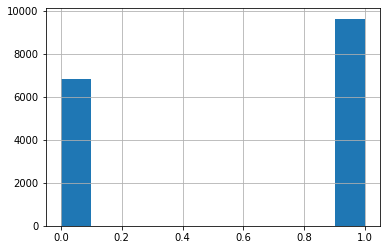

In [28]:
response_and_score['review_scores_rating_bins'].hist();

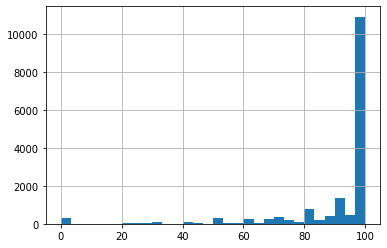

In [29]:
response_and_score['host_response_rate'].hist(bins = 30);

The same technique will be applied for host_response_rate. In this case, the technique is applied in order to facilitate the analysis:
- 0: [0, 10]
- 1: (10, 20]
- 2: (20, 30]
- 3: (30, 40]
- 4: (40, 50]
- 5: (50, 60]
- 6: (60, 70]
- 7: (70, 80]
- 8: (80, 90]
- 9: (90, 100]

In [30]:
response_rate_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
response_rate_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
response_and_score['host_response_rate_bins'] = pd.cut(response_and_score['host_response_rate'], response_rate_bins, labels = response_rate_labels, include_lowest = True)

In [32]:
response_and_score.groupby('host_response_rate_bins').agg({'review_scores_rating_bins':'mean'}).reset_index()

,host_response_rate_bins,review_scores_rating_bins
0,0,0.599369
1,1,0.595238
2,2,0.578947
3,3,0.614130
4,4,0.560322
5,5,0.578014
6,6,0.542636
7,7,0.528649
8,8,0.574247
9,9,0.594645


The result shows that the review scores rating isn't affected by the host response rate. The conclusion goes against the premise that this two variables would be directly proportional. The conclusion isn't an absurde, since not everyone cares about the host response rate, there are more important factors that influences the review scores rate: location, price, hostpitality, home cleanliness and etc.

# Part III: Airbnb growth through the years

Based on the datasets avaiables, the **review.csv** is the one with that has the best features to retrieve this information. The dataset contains the date of each review. Therefore, this analysis will be based on the number of reviews per day. The assumption that it's made here, is that most of people leaves a review after a stay. 

After a quick research I found that approximately 60%-70% of guests leaves a review

In [33]:
# Checking for null values
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         76
dtype: int64

Prepocessing date column and grouping reviews by month. A monthly window was chosen for analysis.

In [34]:
# Convert datime format
func_datetime = lambda x: str(x)[:7]

In [35]:
reviews['date'] = reviews.date.apply(func_datetime)

In [36]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [37]:
reviews['month'] = reviews['date'].dt.month

In [38]:
reviews['year'] = reviews['date'].dt.year

In [39]:
reviews = reviews.sort_values(by = 'date').reset_index(drop = True)

In [40]:
reviews_time_series = reviews.groupby(['date', 'month', 'year']).agg({'listing_id': 'count'}).reset_index()

In [41]:
reviews_time_series.rename(columns = {'listing_id': 'total_reviews'}, inplace = True)

In [42]:
# Checking if all months are presented in every year
reviews_time_series.groupby('year').month.count()

year
2010     7
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020     1
Name: month, dtype: int64

In [43]:
reviews_time_series.set_index('date', inplace = True)

In [44]:
reviews_time_series.head()

,month,year,total_reviews
date,,,
2010-06-01,6,2010,1
2010-07-01,7,2010,4
2010-08-01,8,2010,4
2010-09-01,9,2010,7
2010-10-01,10,2010,5


Plotting time series. Total_reviews vs date(month)

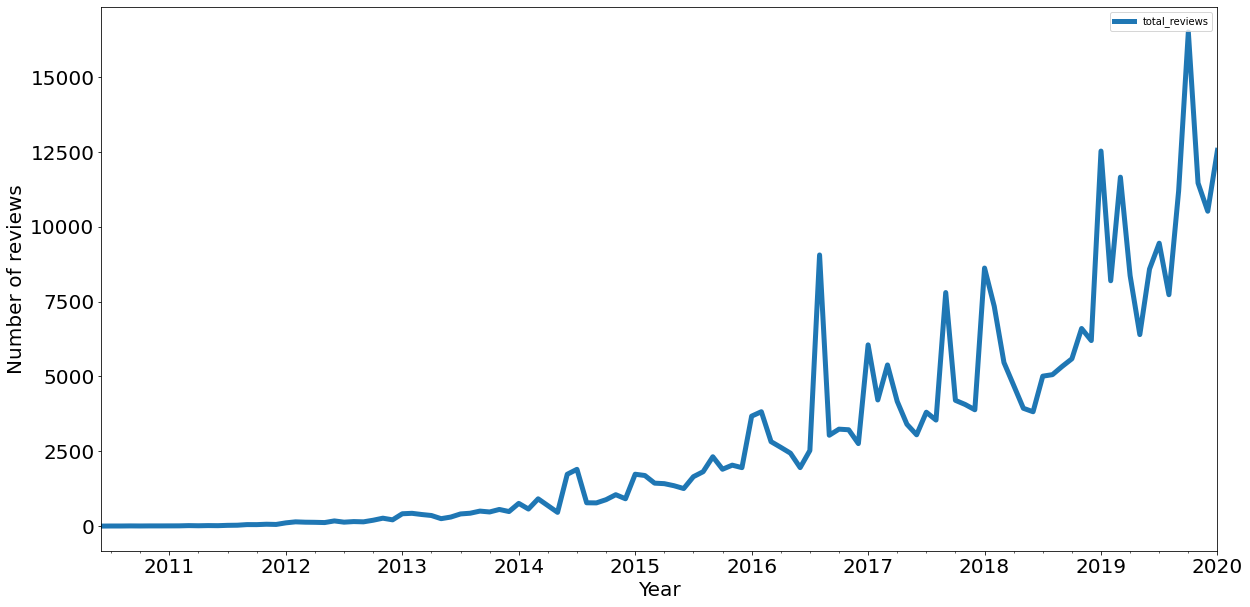

In [45]:
reviews_time_series.plot(y = 'total_reviews', linewidth = 5, fontsize = 20, figsize = (20,10));
plt.ylabel('Number of reviews', fontsize = 20);
plt.xlabel('Year', fontsize = 20);

From the time series above it's possible to observe a trend. In the following graph the trend was extract from the time series by taking a rolling average, which means that, for each time point, the average of the points is taken on either side of it. For the window size, a window of 12 months was used, in order to observe yearly seasonality.

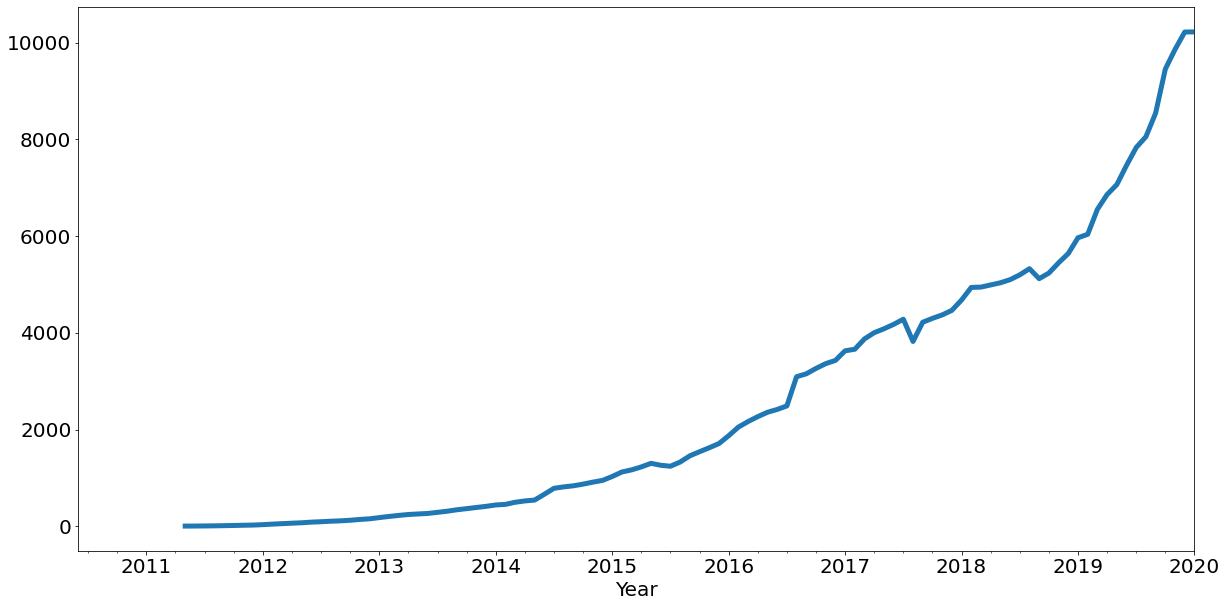

In [46]:
# Checking the existing of a trend
reviews_time_series.total_reviews.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

For analyzing seasonality, we must remove the trend. A "differencing" method was used to obtain the seasonality, as presented below. Nevertheless, the graph below wasn't promising, it's not clear what is the time series seasonality

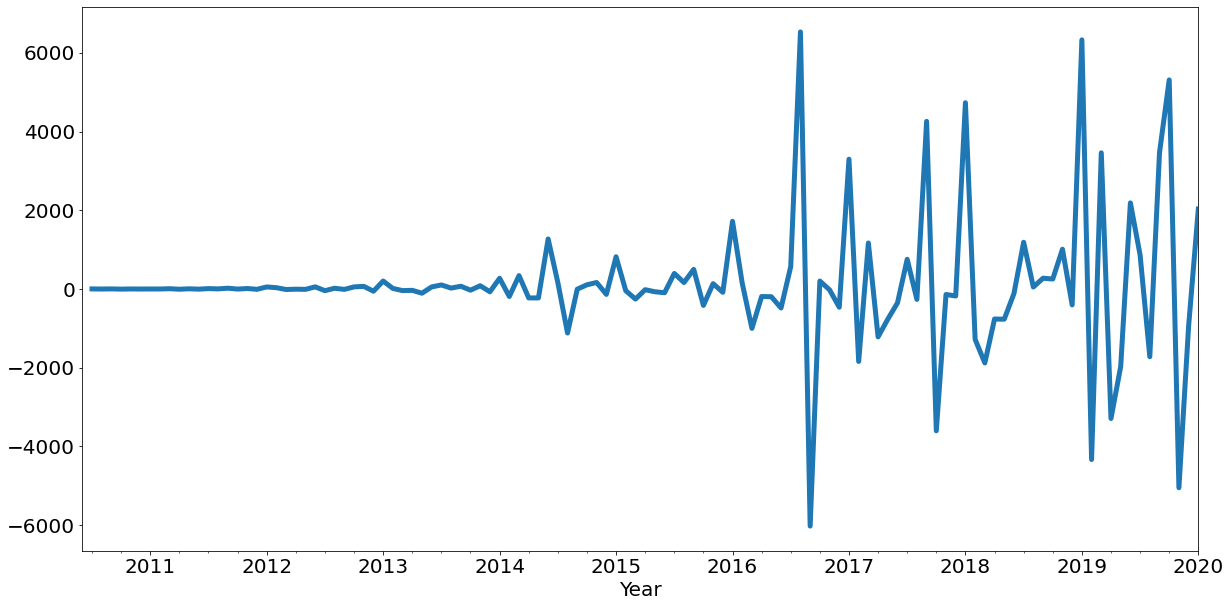

In [47]:
# Checking the existing of seasonality
reviews_time_series.total_reviews.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

From the box plot below it's possible to analyze that january has a higher mean value when compared to the other months, which can be explained by the fact that's summer season in Rio de Janeiro 

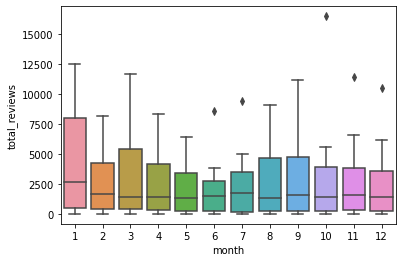

In [48]:
sns.boxplot(x = 'month', y = 'total_reviews', data = reviews_time_series);

Based on a yearly seasonality what is expected to analyze from an autocorrelation plot is a spike at 12 months, meaning that the time series is correlated with itself shifted by twelve months.

From the autocorrelation plot we observe that, the time series is correlated (with a 95% confidence interval ) to its 24 past months. This result isn't very clear, and a further study is required for better conclusions.

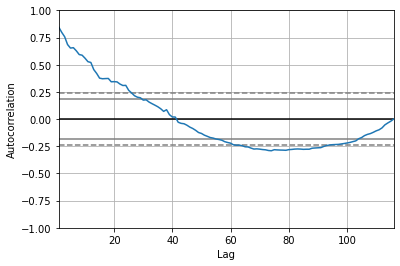

In [49]:
pd.plotting.autocorrelation_plot(reviews_time_series['total_reviews']);

# Part IV: How price changes based on the number of accommodates?

In [50]:
listing['accommodates'].describe()

count    34747.000000
mean         4.202233
std          2.606418
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max        160.000000
Name: accommodates, dtype: float64

For higher accomodates, that less sample it has. 

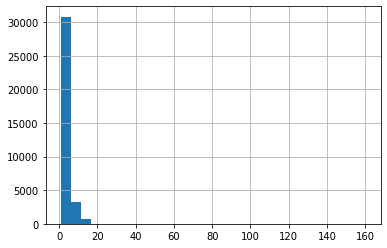

In [51]:
listing['accommodates'].hist(bins = 30);

Values that are bigger than 16 are getting groupped together

In [52]:
listing.loc[listing['accommodates'] >= 16,'accommodates'] = 16

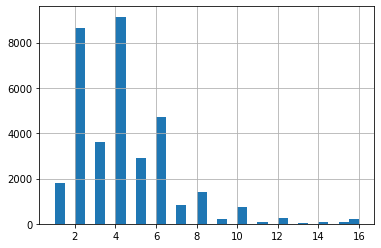

In [53]:
listing['accommodates'].hist(bins = 30);

As suspect, the variables are directly proportional. 

In [54]:
listing.groupby('accommodates').agg({'price_bins': 'mean'})

,price_bins
accommodates,
1,1.633371
2,2.687710
3,3.130326
4,4.386003
5,4.964359
6,5.706570
7,5.880141
8,6.402817
9,6.049550
